# Heart Disease dataset

## Objectif

On utilise pour ce projet un jeu de données récolté pendant une étude sur les maladies cardiaques réalisée par la fondation de la clinique de Cleveland aux États-Unis. Il s'agit pour chaque patient testé d'indiquer s'il a une maladie cardiaque ou non, et cette information est accompagnée de tout un ensemble de caractéristiques.

Le but ici sera donc de trouver un moyen de prédire si un patient est malade ou non en fonction des caractéristiques récoltées, spécifiquement en utilisant un arbre de décision.

## Import des données

In [15]:
# Setup

import TDlib as td
import pandas as pd
from pprint import pprint

# Import data

data = pd.read_csv('dataset.csv')

categories = {
    "sex":      {0: "Female",           1: "Male"},
    "cp":       {0: "Typical angina",   1: "Atypical angina",   2: "non-anginal pain",  3: "asymptomatic"},
    "fbs":      {0: "Below",            1: "Above"},
    "restecg":  {0: "Normal",           1: "Abnormal",          2: "hypertrophy"},
    "exang":    {0: "No",               1: "Yes"},
    "slope":    {1: "Upsloping",        2: "Flat",              3: "Downsloping"},
    "thal":     {3: "Normal",           6: "Fixed defect",      7: "Reversable defect"},
    "target":   {0: "Healthy",          1: "Sick"}
}

for key in categories.keys():
    data[key] = data[key].astype("category")

predict_column = "target"

## Description des données

In [16]:
# Visualize data

print(data)

     age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope  ca  \
0     63   1  3       145   233   1       0      150     0      2.3     0   0   
1     37   1  2       130   250   0       1      187     0      3.5     0   0   
2     41   0  1       130   204   0       0      172     0      1.4     2   0   
3     56   1  1       120   236   0       1      178     0      0.8     2   0   
4     57   0  0       120   354   0       1      163     1      0.6     2   0   
..   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ...  ..   
298   57   0  0       140   241   0       1      123     1      0.2     1   0   
299   45   1  3       110   264   0       1      132     0      1.2     1   0   
300   68   1  0       144   193   1       1      141     0      3.4     1   2   
301   57   1  0       130   131   0       1      115     1      1.2     1   1   
302   57   0  1       130   236   0       0      174     0      0.0     1   1   

    thal target  
0      1 

### Variables du jeu de données

On observe dans ce jeu de données 14 variables :

| Variable   | Type                           | Description                               |
|------------|--------------------------------|-------------------------------------------|
| `age`      | Variable quantitative discrète | Âge du patient (années)                   |
| `sex`      | Variable catégorielle          | Sexe du patient                           |
| `cp`       | Variable catégorielle          | Type de douleurs thoraciques              |
| `trestbps` | Variable quantitative continue | Pression artérielle au repos (mmHg)       |
| `chol`     | Variable quantitative continue | Taux de choléstérol (mg/dl)               |
| `fbs`      | Variable catégorielle          | Glycémie à jeun (> 120 mg/dl)             |
| `restecg`  | Variable catégorielle          | Résultats d'électrocardiographie au repos |
| `thalach`  | Variable quantitative discrète | Rythme cardiaque maximal                  |
| `exang`    | Variable catégorielle          | Angine dûe à l'exercice                   |
| `oldpeak`  | Variable quantitative continue | ?                                         |
| `slope`    | Variable catégorielle          | ?                                         |
| `ca`       | Variable quantitative discrète | ?                                         |
| `thal`     | Variable catégorielle          | ?                                         |
| `target`   | Variable catégorielle          | Diagnostic de maladie cardiaque           |

* Quatre de ces variables sont difficiles à comprendre pour quelqu'un qui ne fait pas de médecine (mais ce ne sera pas un problème de les utiliser pour ce projet)
* On note une grande quantité de variables catégorielles
* `target` est la variable que l'on va tenter de prédire

In [17]:
# Describe data

print(data.describe(percentiles=[0.5]))

print("\nRépartition des diagnostics :")
print(data['target'].value_counts(normalize=True) * 100)
print("\nRépartition des sexes :")
print(data['sex'].value_counts(normalize=True) * 100)

              age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604    0.729373
std      9.082101   17.538143   51.830751   22.905161    1.161075    1.022606
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000    0.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000

Répartition des diagnostics :
1    54.455446
0    45.544554
Name: target, dtype: float64

Répartition des sexes :
1    68.316832
0    31.683168
Name: sex, dtype: float64


* Un total de 303 patients a été testé
* 54.45 % d'entre eux ont été diagnostiqués malades
  * On a une répartition à peu près équitable entre les malades et non-malades
* 68.31 % d'entre eux sont des hommes
  * On note ici un fort biais d'échantillonnage envers les hommes
* L'âge moyen des patients est 54.36 ans, avec un âge médian de 55 ans avec un écart moyen de 9 ans
  * Cela montre un probable un autre biais d'échantillonnage, car c'est une fourchette d'âge où on est plus susceptible de se trouver à l'hôpital en raison de problèmes de coeur, ou pour se faire dépister
* Il est difficile d'interpréter les autres variables quantitatives sans avoir de connaissances en médecine

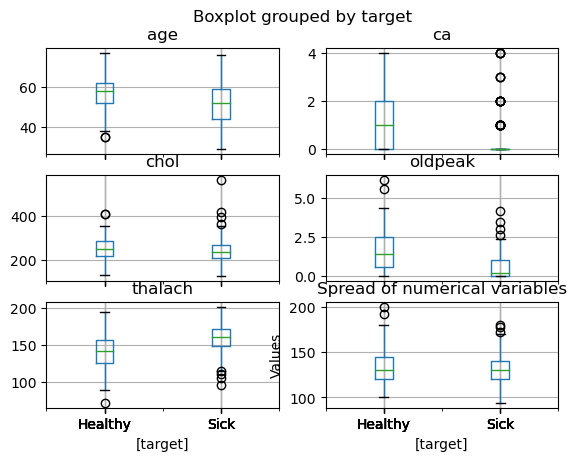

In [18]:
# Display boxplots

td.displayBoxplot(
    td.renameCategories(data, categories),
    predict_column,
    sharey=False
)

On remarque par ces boîtes à moustaches groupées que la variable `oldpeak` présente de grandes disparités qui semble être liées au diagnostic.

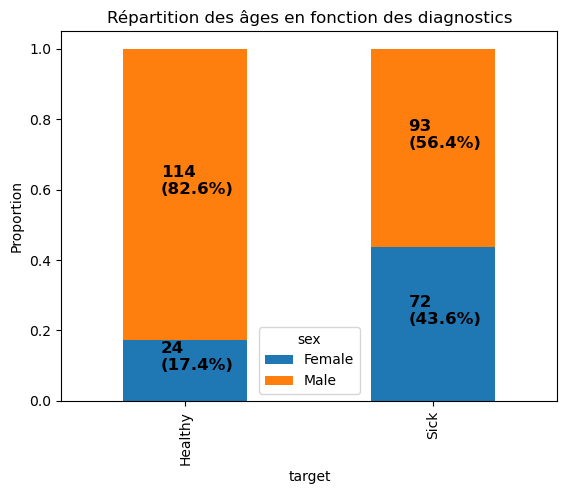

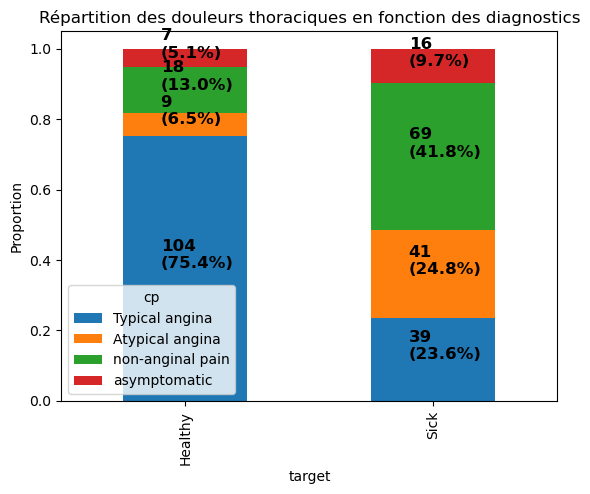

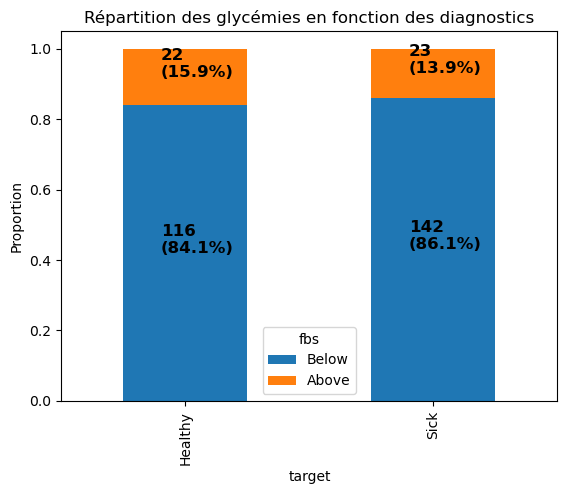

In [19]:
td.displayCrosstab(data, categories, ['target', 'sex'], "Répartition des âges en fonction des diagnostics")
td.displayCrosstab(data, categories, ['target', 'cp'], "Répartition des douleurs thoraciques en fonction des diagnostics")
td.displayCrosstab(data, categories, ['target', 'fbs'], "Répartition des glycémies en fonction des diagnostics")

On note que :
* La proportion d'hommes est bien plus grande chez les patiens sains, alors que c'est relativement équilibré chez les patiens malades
* Les patients sains semblent présenter tous le même type de douleurs thoraciques, alors que les douleurs non-anginales semblent être majoritaires chez les patients malades
* La plupart des patients ont une faible glycémie, et la proportion est identique chez les patients malades et les patients sains

## Utilisation d'un arbre de décision

Toutes les variables telles qu'elles nous sont données ne semblent pas montrer de manière claire une façon de prédire le diagnostic, il va donc falloir recourir à un arbre de décision pour tenter de le faire.

### Mise en forme des données d'entraînement et de test

In [30]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns!=predict_column]
Y = data[predict_column]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.describe())
print()
print(X_test.describe())
print()
print(Y_train.describe())
print()
print(Y_test.describe())

              age    trestbps        chol     thalach     oldpeak          ca
count  227.000000  227.000000  227.000000  227.000000  227.000000  227.000000
mean    54.572687  132.722467  248.211454  149.110132    1.044053    0.757709
std      9.375536   18.549326   52.757076   23.589619    1.190968    1.063626
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     47.000000  120.000000  212.000000  132.000000    0.000000    0.000000
50%     56.000000  130.000000  243.000000  152.000000    0.800000    0.000000
75%     62.000000  140.000000  277.500000  166.500000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000

             age    trestbps        chol     thalach    oldpeak         ca
count  76.000000   76.000000   76.000000   76.000000  76.000000  76.000000
mean   53.750000  128.342105  240.447368  151.250000   1.026316   0.644737
std     8.170067   13.680695   48.831791   20.791104   1.074228   0.8900

### Première tentative d'arbre

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])


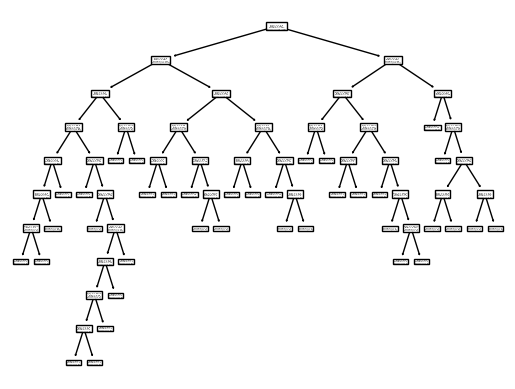

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, Y_train)

pprint(dtc.get_params())
print()

plot_tree(dtc)

predict = dtc.predict(X_test)
pprint(predict)

En laissant les paramètres par défaut, on obtient un arbre très complexe et illisible : on va donc jouer sur ces paramètres afin de le simplifier.

On pourra jouer sur les paramètres suivants :

* `criterion`
* `max_depth` : Distance maximale entre la racine et la feuille la plus éloignée
* `min_samples_leaf`
* `ccp_alpha`

# ccp_alpha permet d'élaguer un arbre dense
# Tracer accuracy = f(max_depth) etc


### Next

In [21]:
# DTC

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.loc[:, data.columns!=predict_column]
Y = data[predict_column]

accuracies = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, Y)

    dtc = DecisionTreeClassifier(
        criterion="log_loss"
    )
    dtc.fit(x_train, y_train)

    true = y_test
    predict = dtc.predict(x_test)
    accuracy = accuracy_score(true, predict)

    accuracies.append(accuracy)

print(pd.DataFrame(accuracies).describe(percentiles=[]))

                0
count  100.000000
mean     0.755000
std      0.047045
min      0.618421
50%      0.750000
max      0.881579
